In [ ]:
!pip install prophet

     |████████████████████████████████| 65 kB 3.4 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640265 sha256=eb956cdb0d93a3652f7509909ad35041f2b6f4c3a027a626db3e6ca0a8db278a
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [ ]:
import pandas as pd
input_file_name = '/content/data.csv'
df = pd.read_csv(input_file_name)

df.head()

,Timestamp,Heart_Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,92,140
1,17/08/2015 15:10,144,40,92,140
2,17/08/2015 15:11,140,42,89,144
3,17/08/2015 15:12,138,45,93,141
4,17/08/2015 15:13,133,42,94,134


In [ ]:
df.shape

(226, 5)

In [ ]:
df=df[["Timestamp","Heart_Rate"]]
df.head()

,Timestamp,Heart_Rate
0,17/08/2015 15:09,139
1,17/08/2015 15:10,144
2,17/08/2015 15:11,140
3,17/08/2015 15:12,138
4,17/08/2015 15:13,133


In [ ]:
df.columns = ['ds','y']

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
221,2015-08-17 18:50:00,159
222,2015-08-17 18:51:00,151
223,2015-08-17 18:52:00,140
224,2015-08-17 18:53:00,140
225,2015-08-17 18:54:00,138


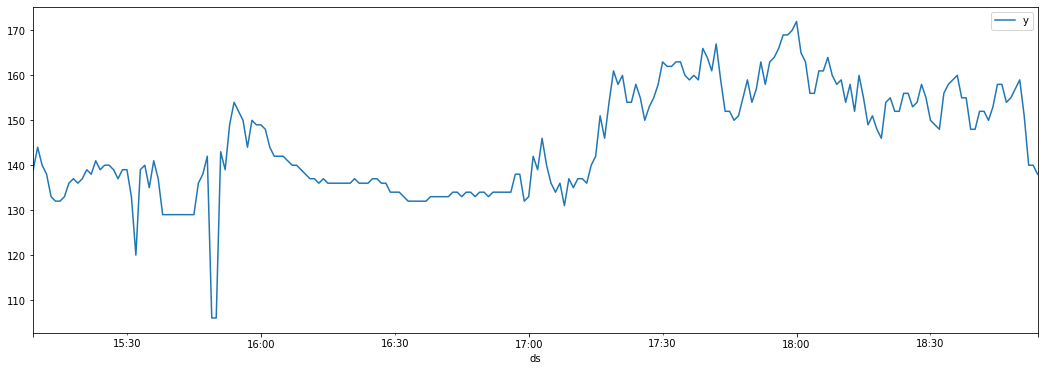

In [ ]:
df.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
len(df)

226

In [ ]:
#train_pct = 0.80
#train_size = int(len(df) * train_pct)
#test_size = len(df) - train_size
#train, test = df[0:train_size], df[train_size:]

In [ ]:
df_model = Prophet(interval_width=0.95)
df_model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df_forecast = df_model.make_future_dataframe(periods=50, freq='1min')
df_forecast = df_model.predict(df_forecast)

<Figure size 1296x432 with 0 Axes>

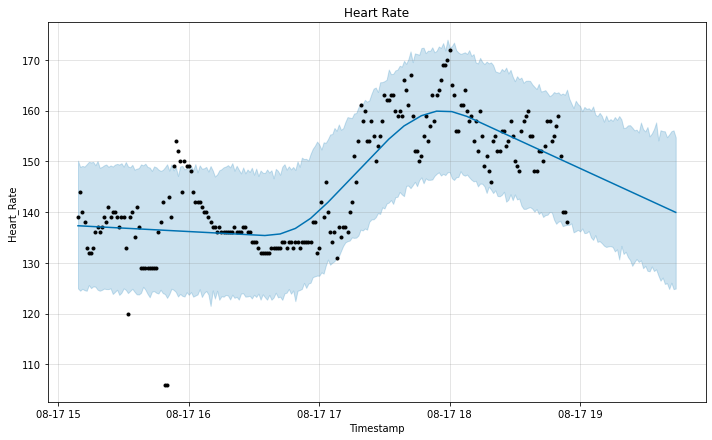

In [ ]:
plt.figure(figsize=(18, 6))
df_model.plot(df_forecast, xlabel = 'Timestamp', ylabel = 'Heart_Rate')
plt.title('Heart Rate');

In [ ]:
df_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
271,2015-08-17 19:40:00,140.719571,125.961004,154.732257,132.758251,148.561926,0.0,0.0,0.0,0.0,0.0,0.0,140.719571
272,2015-08-17 19:41:00,140.522698,124.832580,155.288749,132.245248,148.543148,0.0,0.0,0.0,0.0,0.0,0.0,140.522698
273,2015-08-17 19:42:00,140.325825,126.073827,155.918348,131.789078,148.617579,0.0,0.0,0.0,0.0,0.0,0.0,140.325825
274,2015-08-17 19:43:00,140.128953,124.807385,156.091478,131.332907,148.650951,0.0,0.0,0.0,0.0,0.0,0.0,140.128953
275,2015-08-17 19:44:00,139.932080,124.919355,154.735076,130.876736,148.778964,0.0,0.0,0.0,0.0,0.0,0.0,139.932080


In [ ]:
df_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][226: 250]

,ds,yhat,yhat_lower,yhat_upper
226,2015-08-17 18:55:00,149.578838,137.493686,162.360380
227,2015-08-17 18:56:00,149.381965,137.744211,161.383632
228,2015-08-17 18:57:00,149.185093,135.992385,160.475406
229,2015-08-17 18:58:00,148.988220,136.209482,161.935729
230,2015-08-17 18:59:00,148.791347,136.486385,161.277315
231,2015-08-17 19:00:00,148.594475,136.162208,160.877550
232,2015-08-17 19:01:00,148.397602,136.749899,159.847634
233,2015-08-17 19:02:00,148.200730,135.834096,160.715216
234,2015-08-17 19:03:00,148.003857,135.902763,160.311021
235,2015-08-17 19:04:00,147.806984,136.259964,160.458116


In [ ]:
predictions = df_forecast.iloc[226:250]['yhat']
print(predictions)

226    149.578838
227    149.381965
228    149.185093
229    148.988220
230    148.791347
231    148.594475
232    148.397602
233    148.200730
234    148.003857
235    147.806984
236    147.610112
237    147.413239
238    147.216367
239    147.019494
240    146.822621
241    146.625749
242    146.428876
243    146.232004
244    146.035131
245    145.838258
246    145.641386
247    145.444513
248    145.247641
249    145.050768
Name: yhat, dtype: float64


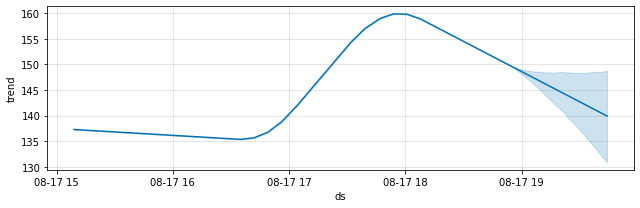

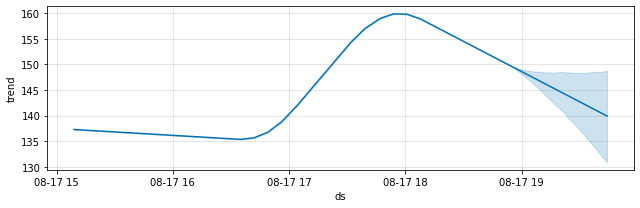

In [ ]:
df_model.plot_components(df_forecast)

In [ ]:
from statsmodels.tools.eval_measures import rmse

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
metric_df = df_forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [ ]:
metric_df.head()

,ds,yhat,y
0,2015-08-17 15:09:00,137.292616,139.0
1,2015-08-17 15:10:00,137.270444,144.0
2,2015-08-17 15:11:00,137.248272,140.0
3,2015-08-17 15:12:00,137.226100,138.0
4,2015-08-17 15:13:00,137.203928,133.0


In [ ]:
metric_df.dropna(inplace=True)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(metric_df.y, metric_df.yhat)
print(r2)

0.7052202760462023


In [ ]:
mse = mean_squared_error(metric_df.y, metric_df.yhat)
print(mse)

40.873872801700706


In [ ]:
mae = mean_absolute_error(metric_df.y, metric_df.yhat)
print(mae)

4.73567208887392


In [ ]:
import numpy as np
rmse = np.sqrt(mse)
print(rmse)

6.393267771781557
